In [1]:
import keras
import tensorflow as tf
import glob
from pathlib import Path
from astropy.io import fits
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout
import time

Using TensorFlow backend.


In [2]:
print(tf.__version__)

2.1.0


# DFNN

# CNN

In [3]:
tic = time.perf_counter()
galaxy = np.zeros((40,40))
for filepath in glob.iglob('../Data/npycutouts/galaxyfits/*npy', recursive=True):
    fp = Path(filepath)
    array = np.load(fp)
    galaxy = np.dstack((galaxy,array))
galaxy = galaxy[:,:,1:]
print(galaxy.shape[2])
toc = time.perf_counter()
print(f"Runtime {toc - tic} seconds")

3123
Runtime 24.6516667 seconds


In [4]:
from scipy.ndimage import rotate
galaxy = np.dstack((galaxy, np.rot90(galaxy,1),np.rot90(galaxy,2),np.rot90(galaxy,3)))
galaxy = np.dstack((galaxy,np.flip(galaxy,axis=0)))
print(len(galaxy))

40


In [5]:
print(galaxy.shape)

(40, 40, 24984)


In [12]:
'''
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
    '''

'\ndatagen = ImageDataGenerator(\n    featurewise_center=True,\n    featurewise_std_normalization=True,\n    rotation_range=20,\n    width_shift_range=0.2,\n    height_shift_range=0.2,\n    horizontal_flip=True)\n    '

In [6]:
tic = time.perf_counter()
star = np.zeros((40,40))
count = 0
for filepath in glob.iglob('../Data/cutouts/starfits/*fits', recursive=True):
    fp = Path(filepath)
    hdulist = fits.open(fp)
    scidata = hdulist[0].data
    scidata = scidata
    star = np.dstack((star,scidata))
    count += 1
    if count == galaxy.shape[2]:
        break
star = star[:,:,1:]
print(star.shape)
toc = time.perf_counter()
print(f"Runtime {toc - tic} seconds")

(40, 40, 24984)
Runtime 1442.974225 seconds


In [7]:
X = np.dstack((galaxy,star))
y = np.dstack((np.ones((1,1,galaxy.shape[2])),np.zeros((1,1,star.shape[2]))))
print(X.shape)

(40, 40, 49968)


In [8]:
X = np.moveaxis(X, -1, 0)
y = np.moveaxis(y, -1, 0)

In [9]:
print(y.shape)

(49968, 1, 1)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [12]:
X_train = X_train.reshape(len(X_train),40,40,1)
X_test = X_test.reshape(len(X_test),40,40,1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
#create model
model = Sequential()
#add model layers
model.add(Conv2D(16, kernel_size=5, activation='relu', input_shape=(40,40,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_initializer='random_normal'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
#Compiling the neural network
model.compile(optimizer ='Adadelta',loss='binary_crossentropy', metrics =['accuracy'])
#Fitting the data to the training dataset
model.fit(X_train,y_train, batch_size=32, epochs=1024, shuffle=True, use_multiprocessing=True)

In [22]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
#create model
model = Sequential()
#add model layers
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(40,40,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Conv2D(32, kernel_size=5, activation='relu',strides=(2,2)))
model.add(Dropout(0.4))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(Conv2D(64, kernel_size=5, activation='relu',strides=(2,2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='random_normal'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))
#Compiling the neural network
model.compile(optimizer =optimizers.Adam(amsgrad=True),loss='binary_crossentropy', metrics =['accuracy'])
#Fitting the data to the training dataset
history = model.fit(X_train,y_train, batch_size=32, epochs=1024, shuffle=True, use_multiprocessing=True)

Epoch 1/1024
39974/39974 [==============================] - 9s 231us/step - loss: 1.5506 - accuracy: 0.7639
Epoch 2/1024
39974/39974 [==============================] - 7s 178us/step - loss: 0.4152 - accuracy: 0.8174
Epoch 3/1024
39974/39974 [==============================] - 7s 182us/step - loss: 0.3859 - accuracy: 0.8321
Epoch 4/1024
39974/39974 [==============================] - 7s 169us/step - loss: 0.3650 - accuracy: 0.8453
Epoch 5/1024
39974/39974 [==============================] - 7s 172us/step - loss: 0.3509 - accuracy: 0.8518
Epoch 6/1024
39974/39974 [==============================] - 7s 179us/step - loss: 0.3380 - accuracy: 0.8594
Epoch 7/1024
39974/39974 [==============================] - 7s 180us/step - loss: 0.3288 - accuracy: 0.8644
Epoch 8/1024
39974/39974 [==============================] - 7s 173us/step - loss: 0.3164 - accuracy: 0.8708
Epoch 9/1024
39974/39974 [==============================] - 7s 175us/step - loss: 0.3055 - accuracy: 0.8758
Epoch 10/1024
39974/39974 [=

39974/39974 [==============================] - 7s 172us/step - loss: 0.1572 - accuracy: 0.9438
Epoch 77/1024
39974/39974 [==============================] - 7s 173us/step - loss: 0.1537 - accuracy: 0.9458
Epoch 78/1024
39974/39974 [==============================] - 7s 172us/step - loss: 0.1545 - accuracy: 0.9449
Epoch 79/1024
39974/39974 [==============================] - 7s 174us/step - loss: 0.1528 - accuracy: 0.9458
Epoch 80/1024
39974/39974 [==============================] - 7s 173us/step - loss: 0.1523 - accuracy: 0.9469
Epoch 81/1024
39974/39974 [==============================] - 7s 172us/step - loss: 0.1542 - accuracy: 0.9467
Epoch 82/1024
39974/39974 [==============================] - 7s 172us/step - loss: 0.1511 - accuracy: 0.9469
Epoch 83/1024
39974/39974 [==============================] - 7s 172us/step - loss: 0.1465 - accuracy: 0.9490
Epoch 84/1024
39974/39974 [==============================] - 7s 173us/step - loss: 0.1489 - accuracy: 0.9478
Epoch 85/1024
39974/39974 [======

39974/39974 [==============================] - 7s 172us/step - loss: 0.1103 - accuracy: 0.9615
Epoch 151/1024
39974/39974 [==============================] - 7s 173us/step - loss: 0.1131 - accuracy: 0.9607
Epoch 152/1024
39974/39974 [==============================] - 7s 172us/step - loss: 0.1120 - accuracy: 0.9612
Epoch 153/1024
39974/39974 [==============================] - 7s 175us/step - loss: 0.1137 - accuracy: 0.9599
Epoch 154/1024
39974/39974 [==============================] - 7s 173us/step - loss: 0.1095 - accuracy: 0.9602
Epoch 155/1024
39974/39974 [==============================] - 7s 172us/step - loss: 0.1099 - accuracy: 0.9618
Epoch 156/1024
39974/39974 [==============================] - 7s 172us/step - loss: 0.1098 - accuracy: 0.9615
Epoch 157/1024
39974/39974 [==============================] - 7s 173us/step - loss: 0.1084 - accuracy: 0.9624
Epoch 158/1024
39974/39974 [==============================] - 7s 172us/step - loss: 0.1114 - accuracy: 0.9614
Epoch 159/1024
39974/3997

39974/39974 [==============================] - 7s 173us/step - loss: 0.0909 - accuracy: 0.9684
Epoch 225/1024
39974/39974 [==============================] - 7s 173us/step - loss: 0.0959 - accuracy: 0.9676
Epoch 226/1024
39974/39974 [==============================] - 7s 173us/step - loss: 0.0902 - accuracy: 0.9690
Epoch 227/1024
39974/39974 [==============================] - 7s 173us/step - loss: 0.0921 - accuracy: 0.9674
Epoch 228/1024
39974/39974 [==============================] - 7s 173us/step - loss: 0.0933 - accuracy: 0.9671
Epoch 229/1024
39974/39974 [==============================] - 7s 172us/step - loss: 0.0911 - accuracy: 0.9679
Epoch 230/1024
39974/39974 [==============================] - 7s 173us/step - loss: 0.0919 - accuracy: 0.9677
Epoch 231/1024
39974/39974 [==============================] - 7s 172us/step - loss: 0.0923 - accuracy: 0.9684
Epoch 232/1024
39974/39974 [==============================] - 7s 173us/step - loss: 0.0884 - accuracy: 0.9692
Epoch 233/1024
39974/3997

39974/39974 [==============================] - 7s 172us/step - loss: 0.0784 - accuracy: 0.9718
Epoch 299/1024
39974/39974 [==============================] - 7s 173us/step - loss: 0.0804 - accuracy: 0.9710
Epoch 300/1024
39974/39974 [==============================] - 7s 172us/step - loss: 0.0768 - accuracy: 0.9729
Epoch 301/1024
39974/39974 [==============================] - 7s 172us/step - loss: 0.0809 - accuracy: 0.9712
Epoch 302/1024
39974/39974 [==============================] - 7s 172us/step - loss: 0.0787 - accuracy: 0.9723
Epoch 303/1024
39974/39974 [==============================] - 7s 173us/step - loss: 0.0773 - accuracy: 0.9723
Epoch 304/1024
39974/39974 [==============================] - 7s 172us/step - loss: 0.0745 - accuracy: 0.9736
Epoch 305/1024
39974/39974 [==============================] - 7s 172us/step - loss: 0.0777 - accuracy: 0.9720
Epoch 306/1024
39974/39974 [==============================] - 7s 173us/step - loss: 0.0920 - accuracy: 0.9671
Epoch 307/1024
39974/3997

39974/39974 [==============================] - 7s 172us/step - loss: 0.0683 - accuracy: 0.9755
Epoch 373/1024
39974/39974 [==============================] - 7s 171us/step - loss: 0.0671 - accuracy: 0.9757
Epoch 374/1024
39974/39974 [==============================] - 7s 171us/step - loss: 0.0653 - accuracy: 0.9756
Epoch 375/1024
39974/39974 [==============================] - 7s 171us/step - loss: 0.0687 - accuracy: 0.9749
Epoch 376/1024
39974/39974 [==============================] - 7s 171us/step - loss: 0.0689 - accuracy: 0.9746
Epoch 377/1024
39974/39974 [==============================] - 7s 171us/step - loss: 0.0659 - accuracy: 0.9752
Epoch 378/1024
39974/39974 [==============================] - 7s 171us/step - loss: 0.0684 - accuracy: 0.9756
Epoch 379/1024
39974/39974 [==============================] - 7s 172us/step - loss: 0.0656 - accuracy: 0.9765
Epoch 380/1024
39974/39974 [==============================] - 7s 171us/step - loss: 0.0680 - accuracy: 0.9758
Epoch 381/1024
39974/3997

39974/39974 [==============================] - 7s 172us/step - loss: 0.0618 - accuracy: 0.9776
Epoch 447/1024
39974/39974 [==============================] - 7s 171us/step - loss: 0.0608 - accuracy: 0.9776
Epoch 448/1024
39974/39974 [==============================] - 7s 172us/step - loss: 0.0591 - accuracy: 0.9775
Epoch 449/1024
39974/39974 [==============================] - 7s 173us/step - loss: 0.0603 - accuracy: 0.9772
Epoch 450/1024
39974/39974 [==============================] - 7s 172us/step - loss: 0.0595 - accuracy: 0.9782
Epoch 451/1024
39974/39974 [==============================] - 7s 172us/step - loss: 0.0594 - accuracy: 0.9771
Epoch 452/1024
39974/39974 [==============================] - 7s 171us/step - loss: 0.0598 - accuracy: 0.9777
Epoch 453/1024
39974/39974 [==============================] - 7s 172us/step - loss: 0.0578 - accuracy: 0.9780
Epoch 454/1024
39974/39974 [==============================] - 7s 172us/step - loss: 0.0579 - accuracy: 0.9779
Epoch 455/1024
39974/3997

39974/39974 [==============================] - 7s 172us/step - loss: 0.0551 - accuracy: 0.9793
Epoch 521/1024
39974/39974 [==============================] - 7s 172us/step - loss: 0.0533 - accuracy: 0.9805
Epoch 522/1024
39974/39974 [==============================] - 7s 172us/step - loss: 0.0535 - accuracy: 0.9804
Epoch 523/1024
39974/39974 [==============================] - 7s 172us/step - loss: 0.0544 - accuracy: 0.9794
Epoch 524/1024
39974/39974 [==============================] - 7s 172us/step - loss: 0.0552 - accuracy: 0.9794
Epoch 525/1024
39974/39974 [==============================] - 7s 172us/step - loss: 0.0560 - accuracy: 0.9788
Epoch 526/1024
39974/39974 [==============================] - 7s 172us/step - loss: 0.0558 - accuracy: 0.9791
Epoch 527/1024
39974/39974 [==============================] - 7s 171us/step - loss: 0.0546 - accuracy: 0.9802
Epoch 528/1024
39974/39974 [==============================] - 7s 172us/step - loss: 0.0532 - accuracy: 0.9801
Epoch 529/1024
39974/3997

39974/39974 [==============================] - 7s 172us/step - loss: 0.0506 - accuracy: 0.9813
Epoch 595/1024
39974/39974 [==============================] - 7s 172us/step - loss: 0.0535 - accuracy: 0.9801
Epoch 596/1024
39974/39974 [==============================] - 7s 172us/step - loss: 0.0482 - accuracy: 0.9818
Epoch 597/1024
39974/39974 [==============================] - 7s 172us/step - loss: 0.0513 - accuracy: 0.9803
Epoch 598/1024
39974/39974 [==============================] - 7s 172us/step - loss: 0.0507 - accuracy: 0.9810
Epoch 599/1024
39974/39974 [==============================] - 7s 172us/step - loss: 0.0517 - accuracy: 0.9801
Epoch 600/1024
39974/39974 [==============================] - 7s 172us/step - loss: 0.0474 - accuracy: 0.9822
Epoch 601/1024
39974/39974 [==============================] - 7s 172us/step - loss: 0.0541 - accuracy: 0.9805
Epoch 602/1024
39974/39974 [==============================] - 7s 172us/step - loss: 0.0516 - accuracy: 0.9800
Epoch 603/1024
39974/3997

39974/39974 [==============================] - 7s 172us/step - loss: 0.0458 - accuracy: 0.9819
Epoch 669/1024
39974/39974 [==============================] - 7s 172us/step - loss: 0.0444 - accuracy: 0.9828
Epoch 670/1024
39974/39974 [==============================] - 7s 171us/step - loss: 0.0442 - accuracy: 0.9830
Epoch 671/1024
39974/39974 [==============================] - 7s 172us/step - loss: 0.0524 - accuracy: 0.9799
Epoch 672/1024
39974/39974 [==============================] - 7s 172us/step - loss: 0.0466 - accuracy: 0.9826
Epoch 673/1024
39974/39974 [==============================] - 7s 172us/step - loss: 0.0445 - accuracy: 0.9828
Epoch 674/1024
39974/39974 [==============================] - 7s 171us/step - loss: 0.0453 - accuracy: 0.9828
Epoch 675/1024
39974/39974 [==============================] - 7s 173us/step - loss: 0.0450 - accuracy: 0.9830
Epoch 676/1024
39974/39974 [==============================] - 7s 173us/step - loss: 0.0465 - accuracy: 0.9819
Epoch 677/1024
39974/3997

39974/39974 [==============================] - 7s 172us/step - loss: 0.0405 - accuracy: 0.9839
Epoch 743/1024
39974/39974 [==============================] - 7s 172us/step - loss: 0.0404 - accuracy: 0.9845
Epoch 744/1024
39974/39974 [==============================] - 7s 173us/step - loss: 0.0407 - accuracy: 0.9838
Epoch 745/1024
39974/39974 [==============================] - 7s 173us/step - loss: 0.0432 - accuracy: 0.9828
Epoch 746/1024
39974/39974 [==============================] - 7s 172us/step - loss: 0.0432 - accuracy: 0.9826
Epoch 747/1024
39974/39974 [==============================] - 7s 171us/step - loss: 0.0428 - accuracy: 0.9832
Epoch 748/1024
39974/39974 [==============================] - 7s 172us/step - loss: 0.0439 - accuracy: 0.9835
Epoch 749/1024
39974/39974 [==============================] - 7s 172us/step - loss: 0.0423 - accuracy: 0.9824
Epoch 750/1024
39974/39974 [==============================] - 7s 172us/step - loss: 0.0395 - accuracy: 0.9842
Epoch 751/1024
39974/3997

39974/39974 [==============================] - 7s 171us/step - loss: 0.0390 - accuracy: 0.9844
Epoch 817/1024
39974/39974 [==============================] - 7s 171us/step - loss: 0.0405 - accuracy: 0.9839
Epoch 818/1024
39974/39974 [==============================] - 7s 171us/step - loss: 0.0401 - accuracy: 0.9840
Epoch 819/1024
39974/39974 [==============================] - 7s 171us/step - loss: 0.0398 - accuracy: 0.9846
Epoch 820/1024
39974/39974 [==============================] - 7s 171us/step - loss: 0.0370 - accuracy: 0.9854
Epoch 821/1024
39974/39974 [==============================] - 7s 170us/step - loss: 0.0381 - accuracy: 0.9852
Epoch 822/1024
39974/39974 [==============================] - 7s 171us/step - loss: 0.0380 - accuracy: 0.9856
Epoch 823/1024
39974/39974 [==============================] - 7s 171us/step - loss: 0.0380 - accuracy: 0.9846
Epoch 824/1024
39974/39974 [==============================] - 7s 172us/step - loss: 0.0391 - accuracy: 0.9839
Epoch 825/1024
39974/3997

39974/39974 [==============================] - 7s 173us/step - loss: 0.0372 - accuracy: 0.9856
Epoch 891/1024
39974/39974 [==============================] - 7s 172us/step - loss: 0.0386 - accuracy: 0.9847
Epoch 892/1024
39974/39974 [==============================] - 7s 172us/step - loss: 0.0355 - accuracy: 0.9854
Epoch 893/1024
39974/39974 [==============================] - 7s 172us/step - loss: 0.0377 - accuracy: 0.9846
Epoch 894/1024
39974/39974 [==============================] - 7s 172us/step - loss: 0.0369 - accuracy: 0.9851
Epoch 895/1024
39974/39974 [==============================] - 7s 172us/step - loss: 0.0404 - accuracy: 0.9842
Epoch 896/1024
39974/39974 [==============================] - 7s 172us/step - loss: 0.0375 - accuracy: 0.9852
Epoch 897/1024
39974/39974 [==============================] - 7s 172us/step - loss: 0.0370 - accuracy: 0.9851
Epoch 898/1024
39974/39974 [==============================] - 7s 172us/step - loss: 0.0381 - accuracy: 0.9849
Epoch 899/1024
39974/3997

39974/39974 [==============================] - 7s 172us/step - loss: 0.0336 - accuracy: 0.9866
Epoch 965/1024
39974/39974 [==============================] - 7s 173us/step - loss: 0.0333 - accuracy: 0.9864
Epoch 966/1024
39974/39974 [==============================] - 7s 172us/step - loss: 0.0377 - accuracy: 0.9858
Epoch 967/1024
39974/39974 [==============================] - 7s 172us/step - loss: 0.0390 - accuracy: 0.9851
Epoch 968/1024
39974/39974 [==============================] - 7s 173us/step - loss: 0.0370 - accuracy: 0.9854
Epoch 969/1024
39974/39974 [==============================] - 7s 173us/step - loss: 0.0361 - accuracy: 0.9859
Epoch 970/1024
39974/39974 [==============================] - 7s 172us/step - loss: 0.0352 - accuracy: 0.9864
Epoch 971/1024
39974/39974 [==============================] - 7s 173us/step - loss: 0.0337 - accuracy: 0.9867
Epoch 972/1024
39974/39974 [==============================] - 7s 173us/step - loss: 0.0337 - accuracy: 0.9864
Epoch 973/1024
39974/3997

In [19]:
print(history.history)

{'loss': [1.3569059150738279, 0.42428966149610975, 0.3932865221570955, 0.37639109414571664, 0.3523866596150411, 0.3367994757072901, 0.32364883910794323, 0.30924839981680496, 0.29446538898546076, 0.29523310030378075, 0.2789766810349432, 0.2820472923114575, 0.27207972413145054, 0.2666166394385329, 0.26171009380515947, 0.2637414573369105, 0.2662456844885663, 0.26001761454139966, 0.2535205616079807, 0.2620049939733762, 0.25630708995412704, 0.25349282424641795, 0.2529768664021737, 0.2498266767219694, 0.26526551470509024, 0.2732925797729839, 0.24420100400117062, 0.24792279668464343, 0.2732022386419831, 0.24833832988715396, 0.24096741417463244, 0.24156946512196847, 0.24869519680277705, 0.2587937611059363, 0.26750511736126537, 0.24942816900903983, 0.23563979464349324, 0.2668432127224914, 0.2468693182002838, 0.2333991577162054, 0.2966167067803896, 0.25501799527817576, 0.23190362492482397, 0.22318437741279554, 0.2429902915079442, 0.24508023465258855, 0.2657131154017289, 0.251793342926864, 0.2628

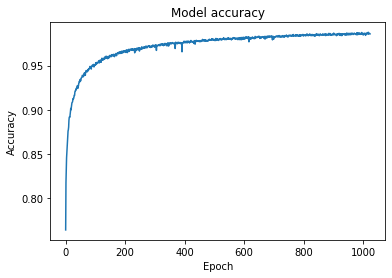

In [23]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt 
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [24]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 38, 38, 32)        320       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 36, 36, 32)        9248      
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 32)        25632     
_________________________________________________________________
dropout_10 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 12, 12, 64)        36928     
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 4, 4, 64)         

In [25]:
eval_model=model.evaluate(X_train, y_train)
eval_model
y_pred=model.predict(X_test)
y_pred =(y_pred>0.5)

39974/39974 [==============================] - 2s 60us/step


In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[4799  206]
 [ 396 4593]]


In [27]:
print(cm[0,1])

206


In [28]:
def MCC(matrix):
    '''
    Calcualtes the Matthews Correlation Coefficient from a confusion matrix
    '''
    return ((matrix[0,0]*matrix[1,1])-(matrix[1,0]*matrix[0,1]))/np.sqrt((cm[0,0]+cm[1,0])*(cm[0,0]+cm[0,1])*(cm[1,1]+cm[1,0])*(cm[1,1]+cm[0,1]))

In [29]:
print("Error Rate:"+'{:.3%}'.format((cm[0,1]+cm[1,0])/np.sum(cm)))
print("Accuracy:"+'{:.3%}'.format((cm[0,0]+cm[1,1])/np.sum(cm)))
print("Sensitivity:"+'{:.3%}'.format((cm[0,0])/np.sum(cm[0,:])))
print("Specificity :"+'{:.3%}'.format((cm[1,1])/np.sum(cm[1,:])))
print("Precision:"+'{:.3%}'.format((cm[0,0])/np.sum(cm[:,0])))
print("False Positive Rate:"+'{:.3%}'.format(1-((cm[1,1])/np.sum(cm[1,:]))))
print("Matthews Correlation Coefficient:"+'{:.3%}'.format(MCC(cm)))

Error Rate:6.024%
Accuracy:93.976%
Sensitivity:95.884%
Specificity :92.063%
Precision:92.377%
False Positive Rate:7.937%
Matthews Correlation Coefficient:88.016%


## Sanity Check

In [ ]:
for filepath in glob.iglob('../Data/cutouts/starfits/*fits', recursive=True):
    fp = Path(filepath)
    hdulist = fits.open(fp)
    scidata = hdulist[0].data
    

In [179]:
filepath = '../Data/cutouts/starfits/starfits-256.fits'
fp = Path(filepath)
hdulist = fits.open(fp)
scidata = hdulist[0].data

In [181]:
# Stars should return 0, galaxies return 1
model.predict(scidata.reshape(1,40,40,1))

array([[0.36742818]], dtype=float32)

In [30]:
tf.__version__

'2.1.0'

# Autokeras

In [163]:
import autokeras as ak

# Initialize the image classifier.
clf = ak.ImageClassifier()
# Feed the image classifier with training data.
clf.fit(X_train, y_train)

# Predict with the best model.
predicted_y = clf.predict(X_test)
print(predicted_y)

# Evaluate the best model with testing data.
print(clf.evaluate(X_test, y_test))

Train for 125 steps, validate for 32 steps
Epoch 1/1000
125/125 [==============================] - ETA: 53s - loss: 0.7693 - accuracy: 0.437 - ETA: 4s - loss: 0.5806 - accuracy: 0.645 - ETA: 2s - loss: 0.5931 - accuracy: 0.65 - ETA: 1s - loss: 0.5914 - accuracy: 0.65 - ETA: 0s - loss: 0.5795 - accuracy: 0.66 - ETA: 0s - loss: 0.5759 - accuracy: 0.66 - ETA: 0s - loss: 0.5747 - accuracy: 0.67 - ETA: 0s - loss: 0.5720 - accuracy: 0.67 - ETA: 0s - loss: 0.5700 - accuracy: 0.67 - ETA: 0s - loss: 0.5691 - accuracy: 0.68 - 1s 10ms/step - loss: 0.5686 - accuracy: 0.6800 - val_loss: 0.5803 - val_accuracy: 0.6997
Epoch 2/1000
125/125 [==============================] - ETA: 3s - loss: 0.4150 - accuracy: 0.71 - ETA: 0s - loss: 0.5196 - accuracy: 0.72 - ETA: 0s - loss: 0.5432 - accuracy: 0.69 - ETA: 0s - loss: 0.5454 - accuracy: 0.70 - ETA: 0s - loss: 0.5393 - accuracy: 0.71 - ETA: 0s - loss: 0.5360 - accuracy: 0.71 - ETA: 0s - loss: 0.5324 - accuracy: 0.71 - ETA: 0s - loss: 0.5332 - accuracy: 0.71

125/125 [==============================] - ETA: 3s - loss: 0.2455 - accuracy: 0.90 - ETA: 0s - loss: 0.1884 - accuracy: 0.94 - ETA: 0s - loss: 0.1898 - accuracy: 0.93 - ETA: 0s - loss: 0.2040 - accuracy: 0.93 - ETA: 0s - loss: 0.2054 - accuracy: 0.92 - ETA: 0s - loss: 0.2041 - accuracy: 0.92 - ETA: 0s - loss: 0.2081 - accuracy: 0.92 - ETA: 0s - loss: 0.2134 - accuracy: 0.92 - ETA: 0s - loss: 0.2102 - accuracy: 0.92 - ETA: 0s - loss: 0.2080 - accuracy: 0.92 - 1s 5ms/step - loss: 0.2085 - accuracy: 0.9269 - val_loss: 0.2215 - val_accuracy: 0.9199
Epoch 32/1000
125/125 [==============================] - ETA: 3s - loss: 0.2199 - accuracy: 0.90 - ETA: 0s - loss: 0.1835 - accuracy: 0.93 - ETA: 0s - loss: 0.1804 - accuracy: 0.93 - ETA: 0s - loss: 0.1874 - accuracy: 0.93 - ETA: 0s - loss: 0.1939 - accuracy: 0.93 - ETA: 0s - loss: 0.2000 - accuracy: 0.92 - ETA: 0s - loss: 0.2018 - accuracy: 0.92 - ETA: 0s - loss: 0.2071 - accuracy: 0.92 - ETA: 0s - loss: 0.2048 - accuracy: 0.92 - ETA: 0s - loss

Train for 125 steps, validate for 32 steps
Epoch 1/1000
125/125 [==============================] - ETA: 11:34 - loss: 0.6038 - accuracy: 0.687 - ETA: 3:50 - loss: 1.5287 - accuracy: 0.687 - ETA: 2:18 - loss: 1.2057 - accuracy: 0.63 - ETA: 1:38 - loss: 1.0812 - accuracy: 0.61 - ETA: 1:15 - loss: 0.9618 - accuracy: 0.60 - ETA: 1:01 - loss: 0.8859 - accuracy: 0.62 - ETA: 51s - loss: 0.8541 - accuracy: 0.6418 - ETA: 44s - loss: 0.8404 - accuracy: 0.633 - ETA: 39s - loss: 0.8151 - accuracy: 0.625 - ETA: 34s - loss: 0.8278 - accuracy: 0.615 - ETA: 31s - loss: 0.8242 - accuracy: 0.595 - ETA: 28s - loss: 0.8016 - accuracy: 0.604 - ETA: 25s - loss: 0.7851 - accuracy: 0.608 - ETA: 23s - loss: 0.7713 - accuracy: 0.608 - ETA: 21s - loss: 0.7601 - accuracy: 0.609 - ETA: 20s - loss: 0.7485 - accuracy: 0.610 - ETA: 18s - loss: 0.7430 - accuracy: 0.612 - ETA: 17s - loss: 0.7337 - accuracy: 0.615 - ETA: 16s - loss: 0.7271 - accuracy: 0.618 - ETA: 15s - loss: 0.7163 - accuracy: 0.624 - ETA: 14s - loss: 

Epoch 6/1000
125/125 [==============================] - ETA: 7s - loss: 0.2376 - accuracy: 0.93 - ETA: 4s - loss: 0.3133 - accuracy: 0.88 - ETA: 4s - loss: 0.2918 - accuracy: 0.88 - ETA: 4s - loss: 0.2956 - accuracy: 0.87 - ETA: 4s - loss: 0.2941 - accuracy: 0.87 - ETA: 4s - loss: 0.2887 - accuracy: 0.88 - ETA: 3s - loss: 0.2931 - accuracy: 0.88 - ETA: 3s - loss: 0.2959 - accuracy: 0.88 - ETA: 3s - loss: 0.3005 - accuracy: 0.87 - ETA: 3s - loss: 0.3042 - accuracy: 0.87 - ETA: 3s - loss: 0.3136 - accuracy: 0.87 - ETA: 3s - loss: 0.3100 - accuracy: 0.88 - ETA: 3s - loss: 0.2973 - accuracy: 0.88 - ETA: 3s - loss: 0.2931 - accuracy: 0.88 - ETA: 3s - loss: 0.2810 - accuracy: 0.89 - ETA: 3s - loss: 0.2784 - accuracy: 0.89 - ETA: 3s - loss: 0.2734 - accuracy: 0.89 - ETA: 3s - loss: 0.2791 - accuracy: 0.89 - ETA: 2s - loss: 0.2865 - accuracy: 0.89 - ETA: 2s - loss: 0.2808 - accuracy: 0.89 - ETA: 2s - loss: 0.2804 - accuracy: 0.89 - ETA: 2s - loss: 0.2762 - accuracy: 0.89 - ETA: 2s - loss: 0.27

Epoch 9/1000
125/125 [==============================] - ETA: 6s - loss: 0.2046 - accuracy: 0.93 - ETA: 4s - loss: 0.2807 - accuracy: 0.89 - ETA: 4s - loss: 0.2443 - accuracy: 0.91 - ETA: 4s - loss: 0.2617 - accuracy: 0.90 - ETA: 4s - loss: 0.2479 - accuracy: 0.90 - ETA: 3s - loss: 0.2369 - accuracy: 0.91 - ETA: 3s - loss: 0.2486 - accuracy: 0.90 - ETA: 3s - loss: 0.2497 - accuracy: 0.90 - ETA: 3s - loss: 0.2453 - accuracy: 0.90 - ETA: 3s - loss: 0.2520 - accuracy: 0.90 - ETA: 3s - loss: 0.2589 - accuracy: 0.90 - ETA: 3s - loss: 0.2543 - accuracy: 0.90 - ETA: 3s - loss: 0.2463 - accuracy: 0.91 - ETA: 3s - loss: 0.2437 - accuracy: 0.90 - ETA: 3s - loss: 0.2356 - accuracy: 0.91 - ETA: 3s - loss: 0.2371 - accuracy: 0.91 - ETA: 3s - loss: 0.2316 - accuracy: 0.91 - ETA: 3s - loss: 0.2358 - accuracy: 0.91 - ETA: 2s - loss: 0.2418 - accuracy: 0.90 - ETA: 2s - loss: 0.2377 - accuracy: 0.91 - ETA: 2s - loss: 0.2413 - accuracy: 0.90 - ETA: 2s - loss: 0.2390 - accuracy: 0.90 - ETA: 2s - loss: 0.24

Epoch 12/1000
125/125 [==============================] - ETA: 6s - loss: 0.2380 - accuracy: 0.90 - ETA: 4s - loss: 0.2505 - accuracy: 0.91 - ETA: 4s - loss: 0.2067 - accuracy: 0.93 - ETA: 4s - loss: 0.2271 - accuracy: 0.91 - ETA: 4s - loss: 0.2048 - accuracy: 0.93 - ETA: 4s - loss: 0.1957 - accuracy: 0.93 - ETA: 3s - loss: 0.2075 - accuracy: 0.93 - ETA: 3s - loss: 0.2071 - accuracy: 0.92 - ETA: 3s - loss: 0.2032 - accuracy: 0.93 - ETA: 3s - loss: 0.2075 - accuracy: 0.93 - ETA: 3s - loss: 0.2111 - accuracy: 0.93 - ETA: 3s - loss: 0.2063 - accuracy: 0.93 - ETA: 3s - loss: 0.2002 - accuracy: 0.93 - ETA: 3s - loss: 0.1963 - accuracy: 0.93 - ETA: 3s - loss: 0.1887 - accuracy: 0.93 - ETA: 3s - loss: 0.1871 - accuracy: 0.93 - ETA: 3s - loss: 0.1819 - accuracy: 0.94 - ETA: 3s - loss: 0.1885 - accuracy: 0.94 - ETA: 2s - loss: 0.1902 - accuracy: 0.93 - ETA: 2s - loss: 0.1904 - accuracy: 0.93 - ETA: 2s - loss: 0.1949 - accuracy: 0.93 - ETA: 2s - loss: 0.1917 - accuracy: 0.93 - ETA: 2s - loss: 0.1

Epoch 15/1000
125/125 [==============================] - ETA: 6s - loss: 0.2007 - accuracy: 0.90 - ETA: 4s - loss: 0.2788 - accuracy: 0.89 - ETA: 4s - loss: 0.2220 - accuracy: 0.91 - ETA: 4s - loss: 0.2359 - accuracy: 0.91 - ETA: 4s - loss: 0.2048 - accuracy: 0.93 - ETA: 4s - loss: 0.1926 - accuracy: 0.93 - ETA: 3s - loss: 0.2024 - accuracy: 0.93 - ETA: 3s - loss: 0.1941 - accuracy: 0.93 - ETA: 3s - loss: 0.1893 - accuracy: 0.93 - ETA: 3s - loss: 0.1960 - accuracy: 0.93 - ETA: 3s - loss: 0.2064 - accuracy: 0.93 - ETA: 3s - loss: 0.2013 - accuracy: 0.93 - ETA: 3s - loss: 0.1943 - accuracy: 0.93 - ETA: 3s - loss: 0.1894 - accuracy: 0.93 - ETA: 3s - loss: 0.1807 - accuracy: 0.93 - ETA: 3s - loss: 0.1767 - accuracy: 0.94 - ETA: 3s - loss: 0.1755 - accuracy: 0.94 - ETA: 3s - loss: 0.1793 - accuracy: 0.93 - ETA: 2s - loss: 0.1797 - accuracy: 0.93 - ETA: 2s - loss: 0.1793 - accuracy: 0.93 - ETA: 2s - loss: 0.1830 - accuracy: 0.93 - ETA: 2s - loss: 0.1786 - accuracy: 0.93 - ETA: 2s - loss: 0.1

Epoch 20/1000
125/125 [==============================] - ETA: 7s - loss: 0.2149 - accuracy: 0.93 - ETA: 4s - loss: 0.2269 - accuracy: 0.91 - ETA: 4s - loss: 0.1809 - accuracy: 0.93 - ETA: 4s - loss: 0.1898 - accuracy: 0.92 - ETA: 4s - loss: 0.1755 - accuracy: 0.94 - ETA: 3s - loss: 0.1731 - accuracy: 0.94 - ETA: 3s - loss: 0.1988 - accuracy: 0.93 - ETA: 3s - loss: 0.1958 - accuracy: 0.93 - ETA: 3s - loss: 0.1909 - accuracy: 0.93 - ETA: 3s - loss: 0.1989 - accuracy: 0.93 - ETA: 3s - loss: 0.2036 - accuracy: 0.93 - ETA: 3s - loss: 0.2011 - accuracy: 0.93 - ETA: 3s - loss: 0.1948 - accuracy: 0.93 - ETA: 3s - loss: 0.1911 - accuracy: 0.93 - ETA: 3s - loss: 0.1838 - accuracy: 0.93 - ETA: 3s - loss: 0.1809 - accuracy: 0.93 - ETA: 3s - loss: 0.1799 - accuracy: 0.93 - ETA: 2s - loss: 0.1826 - accuracy: 0.93 - ETA: 2s - loss: 0.1827 - accuracy: 0.93 - ETA: 2s - loss: 0.1827 - accuracy: 0.93 - ETA: 2s - loss: 0.1863 - accuracy: 0.93 - ETA: 2s - loss: 0.1818 - accuracy: 0.93 - ETA: 2s - loss: 0.1

Epoch 23/1000
125/125 [==============================] - ETA: 7s - loss: 0.2818 - accuracy: 0.87 - ETA: 4s - loss: 0.2243 - accuracy: 0.90 - ETA: 4s - loss: 0.1741 - accuracy: 0.92 - ETA: 4s - loss: 0.1897 - accuracy: 0.91 - ETA: 4s - loss: 0.1749 - accuracy: 0.93 - ETA: 3s - loss: 0.1693 - accuracy: 0.93 - ETA: 3s - loss: 0.1842 - accuracy: 0.93 - ETA: 3s - loss: 0.1779 - accuracy: 0.93 - ETA: 3s - loss: 0.1734 - accuracy: 0.93 - ETA: 3s - loss: 0.1793 - accuracy: 0.93 - ETA: 3s - loss: 0.1824 - accuracy: 0.93 - ETA: 3s - loss: 0.1793 - accuracy: 0.93 - ETA: 3s - loss: 0.1717 - accuracy: 0.93 - ETA: 3s - loss: 0.1680 - accuracy: 0.93 - ETA: 3s - loss: 0.1603 - accuracy: 0.94 - ETA: 3s - loss: 0.1548 - accuracy: 0.94 - ETA: 3s - loss: 0.1545 - accuracy: 0.94 - ETA: 2s - loss: 0.1590 - accuracy: 0.94 - ETA: 2s - loss: 0.1591 - accuracy: 0.94 - ETA: 2s - loss: 0.1596 - accuracy: 0.94 - ETA: 2s - loss: 0.1623 - accuracy: 0.94 - ETA: 2s - loss: 0.1583 - accuracy: 0.94 - ETA: 2s - loss: 0.1

Epoch 26/1000
125/125 [==============================] - ETA: 6s - loss: 0.2930 - accuracy: 0.84 - ETA: 4s - loss: 0.2229 - accuracy: 0.90 - ETA: 4s - loss: 0.1732 - accuracy: 0.93 - ETA: 4s - loss: 0.1886 - accuracy: 0.92 - ETA: 4s - loss: 0.1661 - accuracy: 0.93 - ETA: 4s - loss: 0.1626 - accuracy: 0.93 - ETA: 3s - loss: 0.1752 - accuracy: 0.93 - ETA: 3s - loss: 0.1683 - accuracy: 0.93 - ETA: 3s - loss: 0.1625 - accuracy: 0.93 - ETA: 3s - loss: 0.1681 - accuracy: 0.93 - ETA: 3s - loss: 0.1728 - accuracy: 0.93 - ETA: 3s - loss: 0.1708 - accuracy: 0.93 - ETA: 3s - loss: 0.1649 - accuracy: 0.94 - ETA: 3s - loss: 0.1617 - accuracy: 0.94 - ETA: 3s - loss: 0.1549 - accuracy: 0.94 - ETA: 3s - loss: 0.1514 - accuracy: 0.94 - ETA: 3s - loss: 0.1533 - accuracy: 0.94 - ETA: 3s - loss: 0.1516 - accuracy: 0.94 - ETA: 2s - loss: 0.1515 - accuracy: 0.94 - ETA: 2s - loss: 0.1501 - accuracy: 0.94 - ETA: 2s - loss: 0.1522 - accuracy: 0.94 - ETA: 2s - loss: 0.1482 - accuracy: 0.94 - ETA: 2s - loss: 0.1

Train for 125 steps, validate for 32 steps
Epoch 1/1000
125/125 [==============================] - ETA: 52s - loss: 0.6320 - accuracy: 0.625 - ETA: 3s - loss: 0.5612 - accuracy: 0.669 - ETA: 1s - loss: 0.5861 - accuracy: 0.66 - ETA: 1s - loss: 0.5831 - accuracy: 0.66 - ETA: 0s - loss: 0.5789 - accuracy: 0.67 - ETA: 0s - loss: 0.5752 - accuracy: 0.67 - ETA: 0s - loss: 0.5724 - accuracy: 0.67 - ETA: 0s - loss: 0.5704 - accuracy: 0.68 - ETA: 0s - loss: 0.5681 - accuracy: 0.68 - 1s 9ms/step - loss: 0.5685 - accuracy: 0.6820 - val_loss: 0.5826 - val_accuracy: 0.7077
Epoch 2/1000
125/125 [==============================] - ETA: 3s - loss: 0.4427 - accuracy: 0.78 - ETA: 0s - loss: 0.5308 - accuracy: 0.71 - ETA: 0s - loss: 0.5520 - accuracy: 0.69 - ETA: 0s - loss: 0.5484 - accuracy: 0.70 - ETA: 0s - loss: 0.5424 - accuracy: 0.70 - ETA: 0s - loss: 0.5398 - accuracy: 0.71 - ETA: 0s - loss: 0.5351 - accuracy: 0.71 - ETA: 0s - loss: 0.5336 - accuracy: 0.71 - ETA: 0s - loss: 0.5282 - accuracy: 0.72 

125/125 [==============================] - ETA: 3s - loss: 0.2060 - accuracy: 0.93 - ETA: 0s - loss: 0.1932 - accuracy: 0.93 - ETA: 0s - loss: 0.1920 - accuracy: 0.93 - ETA: 0s - loss: 0.2034 - accuracy: 0.92 - ETA: 0s - loss: 0.2050 - accuracy: 0.92 - ETA: 0s - loss: 0.2097 - accuracy: 0.92 - ETA: 0s - loss: 0.2149 - accuracy: 0.92 - ETA: 0s - loss: 0.2141 - accuracy: 0.92 - ETA: 0s - loss: 0.2152 - accuracy: 0.92 - 1s 5ms/step - loss: 0.2148 - accuracy: 0.9227 - val_loss: 0.2444 - val_accuracy: 0.9159
Epoch 32/1000
125/125 [==============================] - ETA: 3s - loss: 0.2205 - accuracy: 0.90 - ETA: 0s - loss: 0.1901 - accuracy: 0.93 - ETA: 0s - loss: 0.1872 - accuracy: 0.93 - ETA: 0s - loss: 0.1922 - accuracy: 0.93 - ETA: 0s - loss: 0.1945 - accuracy: 0.93 - ETA: 0s - loss: 0.1993 - accuracy: 0.93 - ETA: 0s - loss: 0.2019 - accuracy: 0.93 - ETA: 0s - loss: 0.2077 - accuracy: 0.92 - ETA: 0s - loss: 0.2069 - accuracy: 0.92 - 1s 5ms/step - loss: 0.2071 - accuracy: 0.9262 - val_loss

125/125 [==============================] - ETA: 3s - loss: 0.1923 - accuracy: 0.93 - ETA: 0s - loss: 0.1314 - accuracy: 0.95 - ETA: 0s - loss: 0.1308 - accuracy: 0.95 - ETA: 0s - loss: 0.1340 - accuracy: 0.95 - ETA: 0s - loss: 0.1332 - accuracy: 0.95 - ETA: 0s - loss: 0.1381 - accuracy: 0.95 - ETA: 0s - loss: 0.1399 - accuracy: 0.95 - ETA: 0s - loss: 0.1439 - accuracy: 0.94 - ETA: 0s - loss: 0.1427 - accuracy: 0.94 - 1s 5ms/step - loss: 0.1436 - accuracy: 0.9492 - val_loss: 0.2174 - val_accuracy: 0.9289
Epoch 62/1000
125/125 [==============================] - ETA: 3s - loss: 0.1310 - accuracy: 0.96 - ETA: 0s - loss: 0.1257 - accuracy: 0.95 - ETA: 0s - loss: 0.1187 - accuracy: 0.95 - ETA: 0s - loss: 0.1222 - accuracy: 0.95 - ETA: 0s - loss: 0.1232 - accuracy: 0.95 - ETA: 0s - loss: 0.1326 - accuracy: 0.94 - ETA: 0s - loss: 0.1362 - accuracy: 0.94 - ETA: 0s - loss: 0.1377 - accuracy: 0.94 - ETA: 0s - loss: 0.1369 - accuracy: 0.94 - 1s 5ms/step - loss: 0.1356 - accuracy: 0.9490 - val_loss

INFO:tensorflow:Oracle triggered exit
Train for 157 steps, validate for 32 steps
Epoch 1/1000
157/157 [==============================] - ETA: 1:07 - loss: 0.6747 - accuracy: 0.62 - ETA: 4s - loss: 0.5754 - accuracy: 0.6458 - ETA: 2s - loss: 0.5897 - accuracy: 0.65 - ETA: 1s - loss: 0.5843 - accuracy: 0.66 - ETA: 1s - loss: 0.5799 - accuracy: 0.67 - ETA: 0s - loss: 0.5773 - accuracy: 0.67 - ETA: 0s - loss: 0.5752 - accuracy: 0.67 - ETA: 0s - loss: 0.5712 - accuracy: 0.67 - ETA: 0s - loss: 0.5705 - accuracy: 0.68 - ETA: 0s - loss: 0.5703 - accuracy: 0.68 - ETA: 0s - loss: 0.5705 - accuracy: 0.68 - ETA: 0s - loss: 0.5678 - accuracy: 0.68 - 1s 8ms/step - loss: 0.5660 - accuracy: 0.6855 - val_loss: 0.5268 - val_accuracy: 0.7257
Epoch 2/1000
157/157 [==============================] - ETA: 7s - loss: 0.3889 - accuracy: 0.84 - ETA: 0s - loss: 0.5130 - accuracy: 0.71 - ETA: 0s - loss: 0.5441 - accuracy: 0.70 - ETA: 0s - loss: 0.5423 - accuracy: 0.70 - ETA: 0s - loss: 0.5365 - accuracy: 0.71 - E

157/157 [==============================] - ETA: 7s - loss: 0.1769 - accuracy: 0.93 - ETA: 0s - loss: 0.1771 - accuracy: 0.93 - ETA: 0s - loss: 0.1705 - accuracy: 0.93 - ETA: 0s - loss: 0.1802 - accuracy: 0.93 - ETA: 0s - loss: 0.1862 - accuracy: 0.93 - ETA: 0s - loss: 0.1938 - accuracy: 0.93 - ETA: 0s - loss: 0.1951 - accuracy: 0.93 - ETA: 0s - loss: 0.2015 - accuracy: 0.92 - ETA: 0s - loss: 0.2003 - accuracy: 0.93 - ETA: 0s - loss: 0.2004 - accuracy: 0.92 - ETA: 0s - loss: 0.1982 - accuracy: 0.93 - ETA: 0s - loss: 0.1991 - accuracy: 0.93 - 1s 5ms/step - loss: 0.1972 - accuracy: 0.9309 - val_loss: 0.1703 - val_accuracy: 0.9339
Epoch 27/1000
157/157 [==============================] - ETA: 7s - loss: 0.1703 - accuracy: 0.93 - ETA: 0s - loss: 0.1773 - accuracy: 0.93 - ETA: 0s - loss: 0.1719 - accuracy: 0.93 - ETA: 0s - loss: 0.1791 - accuracy: 0.93 - ETA: 0s - loss: 0.1844 - accuracy: 0.93 - ETA: 0s - loss: 0.1945 - accuracy: 0.93 - ETA: 0s - loss: 0.2006 - accuracy: 0.92 - ETA: 0s - loss

157/157 [==============================] - ETA: 7s - loss: 0.2050 - accuracy: 0.90 - ETA: 1s - loss: 0.1585 - accuracy: 0.95 - ETA: 0s - loss: 0.1434 - accuracy: 0.95 - ETA: 0s - loss: 0.1350 - accuracy: 0.95 - ETA: 0s - loss: 0.1408 - accuracy: 0.95 - ETA: 0s - loss: 0.1466 - accuracy: 0.95 - ETA: 0s - loss: 0.1497 - accuracy: 0.95 - ETA: 0s - loss: 0.1515 - accuracy: 0.95 - ETA: 0s - loss: 0.1488 - accuracy: 0.95 - ETA: 0s - loss: 0.1482 - accuracy: 0.95 - ETA: 0s - loss: 0.1464 - accuracy: 0.95 - ETA: 0s - loss: 0.1448 - accuracy: 0.95 - 1s 5ms/step - loss: 0.1428 - accuracy: 0.9524 - val_loss: 0.1486 - val_accuracy: 0.9419
Epoch 52/1000
157/157 [==============================] - ETA: 7s - loss: 0.1950 - accuracy: 0.93 - ETA: 0s - loss: 0.1561 - accuracy: 0.95 - ETA: 0s - loss: 0.1403 - accuracy: 0.95 - ETA: 0s - loss: 0.1407 - accuracy: 0.95 - ETA: 0s - loss: 0.1410 - accuracy: 0.95 - ETA: 0s - loss: 0.1494 - accuracy: 0.94 - ETA: 0s - loss: 0.1512 - accuracy: 0.94 - ETA: 0s - loss

157/157 [==============================] - ETA: 7s - loss: 0.0898 - accuracy: 0.93 - ETA: 1s - loss: 0.0953 - accuracy: 0.96 - ETA: 0s - loss: 0.0957 - accuracy: 0.95 - ETA: 0s - loss: 0.0928 - accuracy: 0.95 - ETA: 0s - loss: 0.1016 - accuracy: 0.95 - ETA: 0s - loss: 0.1050 - accuracy: 0.95 - ETA: 0s - loss: 0.1120 - accuracy: 0.95 - ETA: 0s - loss: 0.1127 - accuracy: 0.95 - ETA: 0s - loss: 0.1113 - accuracy: 0.95 - ETA: 0s - loss: 0.1115 - accuracy: 0.96 - ETA: 0s - loss: 0.1124 - accuracy: 0.95 - ETA: 0s - loss: 0.1093 - accuracy: 0.95 - 1s 5ms/step - loss: 0.1095 - accuracy: 0.9592 - val_loss: 0.1112 - val_accuracy: 0.9650
Epoch 76/1000
157/157 [==============================] - ETA: 7s - loss: 0.1635 - accuracy: 0.93 - ETA: 0s - loss: 0.0992 - accuracy: 0.96 - ETA: 0s - loss: 0.0974 - accuracy: 0.96 - ETA: 0s - loss: 0.1033 - accuracy: 0.96 - ETA: 0s - loss: 0.1104 - accuracy: 0.96 - ETA: 0s - loss: 0.1109 - accuracy: 0.96 - ETA: 0s - loss: 0.1151 - accuracy: 0.95 - ETA: 0s - loss

In [53]:
model = clf.export_model()

## GPU test

In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

In [ ]:
tf.config.list_physical_devices('GPU')

In [ ]:
tf.test.is_built_with_cuda()

In [ ]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

In [ ]:
import tensorflow as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))